In [1]:
import numpy as np
import cv2
from data import *
from utils import *
from matplotlib import pyplot as plt
from matplotlib import patches
import os
from scipy.ndimage import binary_dilation

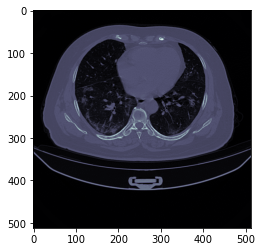

In [2]:
path = os.path.join('train','ct_scan')
sample = os.path.join(path,os.listdir(path)[37])
sample_data = normalize(np.load(sample))*255
sample_data = sample_data.astype(np.uint8)
plt.imshow(sample_data,cmap='bone')
plt.show()


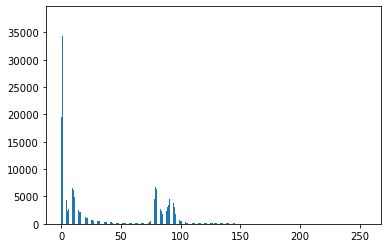

In [3]:
sample_flat = sample_data.flatten()
plt.hist(sample_flat,bins=int(np.ceil(np.sqrt(sample_flat.shape[0]))))
plt.show()

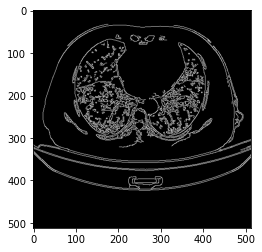

In [4]:
c = cv2.Canny(sample_data,30,120)
plt.imshow(c,cmap='gray')
plt.show()

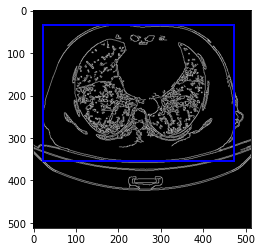

In [5]:
c = cv2.Canny(sample_data,30,120)
contours, hierarchy = cv2.findContours(c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = np.expand_dims(c,axis=2).repeat(3,axis=2)
cnt = max(contours, key=cv2.contourArea)
# print(cnt)
# c = cv2.drawContours(c, cnt, -1, (0, 255, 0), 3)
x,y,w,h = cv2.boundingRect(cnt)
from matplotlib import patches
fig, ax = plt.subplots()
ax.imshow(c)
rect = patches.Rectangle((x,y),w,h,edgecolor='blue',facecolor='none',linewidth=2)
ax.add_patch(rect)
plt.show()

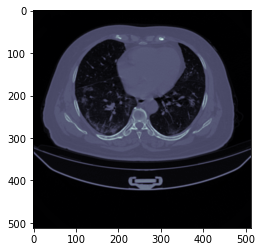

In [6]:
sample_blurred = cv2.GaussianBlur(sample_data,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(sample_blurred,cmap='bone')
plt.show()


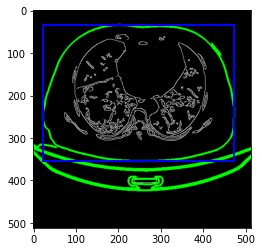

In [7]:
c = cv2.Canny(sample_blurred,30,120)
contours, hierarchy = cv2.findContours(c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = np.expand_dims(c,axis=2).repeat(3,axis=2)
cnt = max(contours, key=cv2.contourArea)
# for k, contour in enumerate(contours):
#     print(k,cv2.contourArea(contour))
# print(cnt)
# c = cv2.drawContours(c, [cnt], 0, (0, 255, 0), 3)
c = cv2.drawContours(c, contours, -1, (0, 255, 0), 3)
x,y,w,h = cv2.boundingRect(cnt)
from matplotlib import patches
fig, ax = plt.subplots()
ax.imshow(c)
rect = patches.Rectangle((x,y),w,h,edgecolor='blue',facecolor='none',linewidth=2)
ax.add_patch(rect)
plt.show()

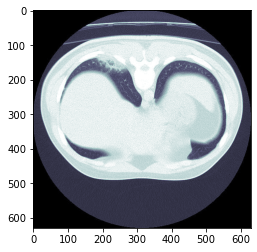

In [8]:
path = os.path.join('train','ct_scan')
sample = os.path.join(path,[f for f in os.listdir(path) if 'radio' in f][37])
sample_data = normalize(np.load(sample))*255
sample_data = sample_data.astype(np.uint8)
plt.imshow(sample_data,cmap='bone')
plt.show()

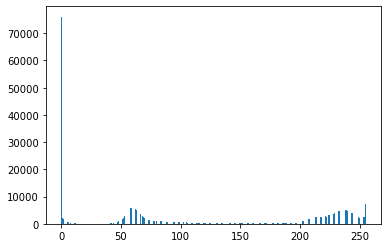

In [9]:
sample_flat = sample_data.flatten()
plt.hist(sample_flat,bins=int(np.ceil(np.sqrt(sample_flat.shape[0]))))
plt.show()

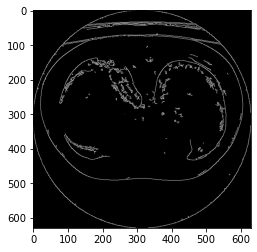

In [10]:
c = cv2.Canny(sample_data,100,255)
plt.imshow(c,cmap='gray')
plt.show()

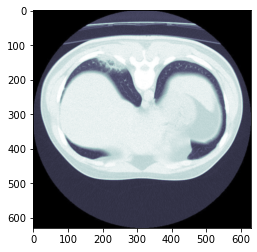

In [11]:
sample_blurred = cv2.GaussianBlur(sample_data,(3,3),cv2.BORDER_DEFAULT)
plt.imshow(sample_blurred,cmap='bone')
plt.show()

255


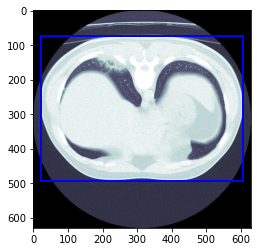

In [12]:
c = cv2.Canny(sample_blurred,100,255)
print(np.max(c))
contours, hierarchy = cv2.findContours(c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = np.expand_dims(c,axis=2).repeat(3,axis=2)
cnt = max(contours, key=cv2.contourArea)
# for k, contour in enumerate(contours):
#     print(k,cv2.contourArea(contour))
# print(cnt)
# c = cv2.drawContours(c, [cnt], 0, (0, 255, 0), 3)
c = cv2.drawContours(c, contours, -1, (0, 255, 0), 3)
x,y,w,h = cv2.boundingRect(cnt)
from matplotlib import patches
fig, ax = plt.subplots()
ax.imshow(c)
ax.imshow(sample_data,cmap='bone')
rect = patches.Rectangle((x,y),w,h,edgecolor='blue',facecolor='none',linewidth=2)
ax.add_patch(rect)
plt.show()

In [13]:
def display_roi(sample_data, sample_id):
    if sample_id == 'corona':
        low = 100
        high = 120
        t = 50
    elif sample_id == 'radio':
        low = 175
        high = 255
        t = 175
    else:
        print(sample_id,'is invalid')
    # sample_blurred = cv2.GaussianBlur(sample_data,(3,3),cv2.BORDER_DEFAULT)
    # c = cv2.Canny(sample_blurred,low,high)
    # c_dil = binary_dilation(c,iterations=5)
    # c[c_dil] = 255
    # left = np.where(c[:,2]==255)[0]
    # if left.shape[0] > 1:
    #     c[left[0]:left[-1],2:5] = 255
    # right = np.where(c[:,-3]==255)[0]
    # if right.shape[0] > 1:
    #     c[right[0]:right[-1],-6:-3] = 255
    # top = np.where(c[2,:]==255)[0]
    # if top.shape[0] > 1:
    #     c[2:5,top[0]:top[-1]] = 255
    # bottom = np.where(c[-3,:]==255)[0]
    # if bottom.shape[0] > 1:
    #     c[-6:-3,bottom[0]:bottom[-1]] = 255
    c = sample_data.copy()
    c[sample_data>t] = 255
    c[sample_data<t] = 0
    c_dil = binary_dilation(c,iterations=5)
    c[c_dil] = 255
    contours, hierarchy = cv2.findContours(c, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    holes = contours
    # holes = [contours[i] for i in range(len(contours)) if hierarchy[0][i][3] >= 0]
    c = np.expand_dims(c,axis=2).repeat(3,axis=2)
    cnt = max(holes, key=cv2.contourArea)
    c = cv2.drawContours(c, holes, -1, (0, 255, 0), 3)
    # c = cv2.drawContours(c, [cnt], 0, (0, 255, 0), 3)
    x,y,w,h = cv2.boundingRect(cnt)
    fig, ax = plt.subplots()
    ax.imshow(c)
    # ax.plot([0 for _ in range(left[0].shape[0])],left[0],'rx')
    # ax.plot([sample_data.shape[-1] for _ in range(right[0].shape[0])],right[0],'rx')
    # ax.imshow(sample_data,cmap='bone')
    rect = patches.Rectangle((x,y),w,h,edgecolor='blue',facecolor='none',linewidth=2)
    ax.add_patch(rect)
    plt.show()

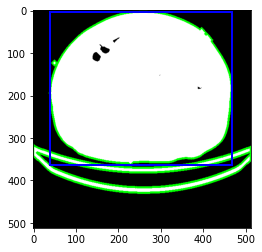

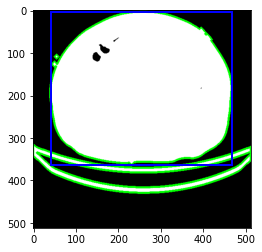

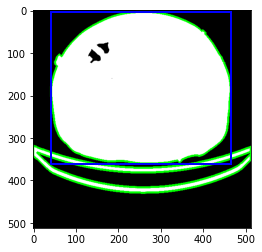

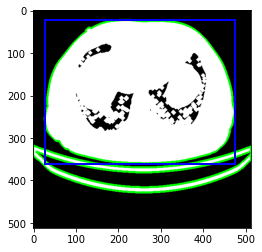

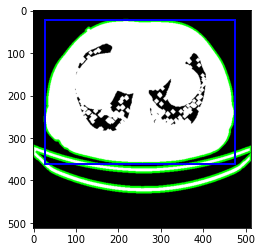

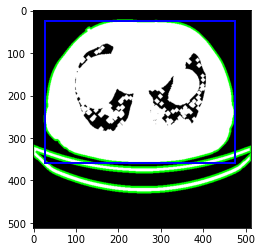

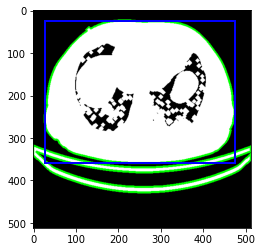

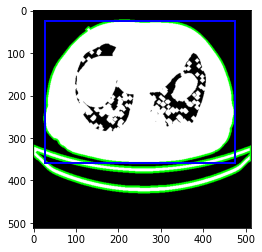

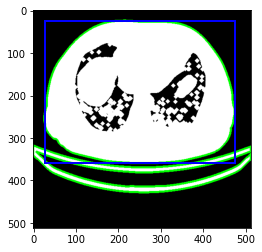

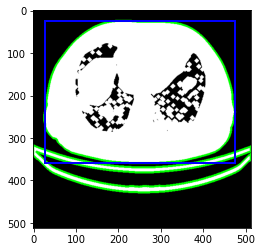

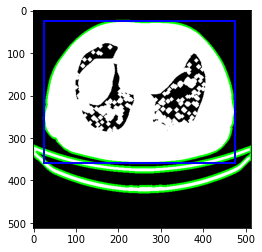

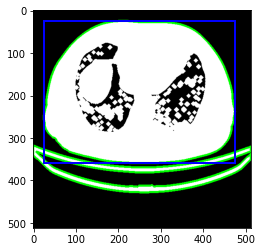

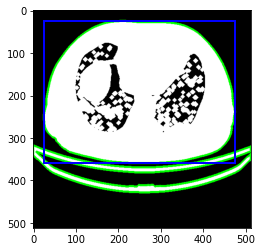

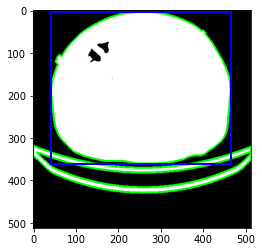

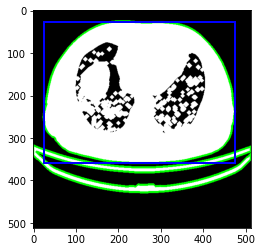

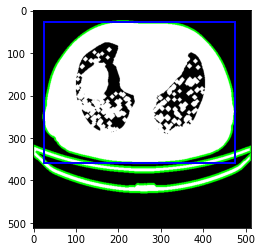

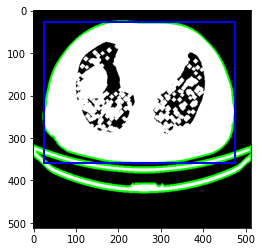

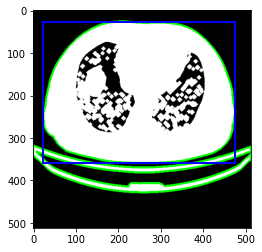

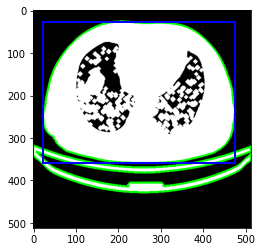

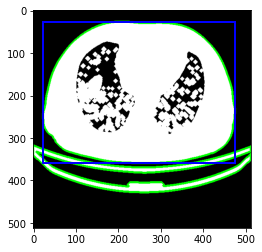

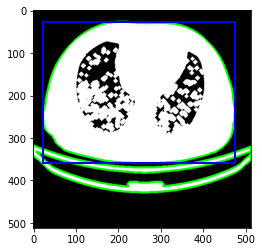

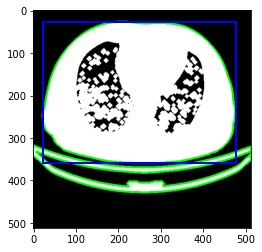

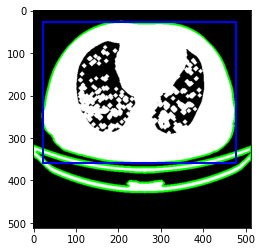

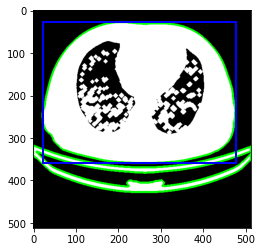

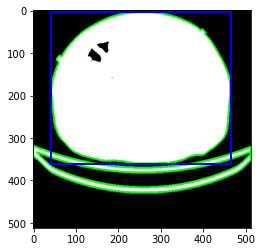

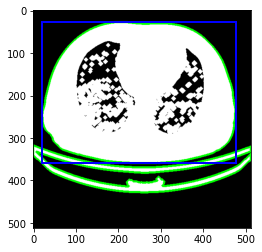

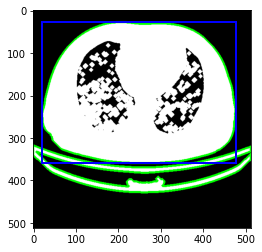

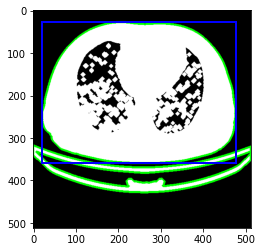

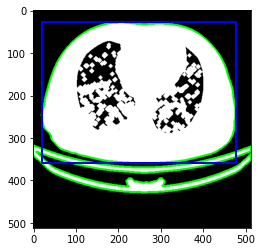

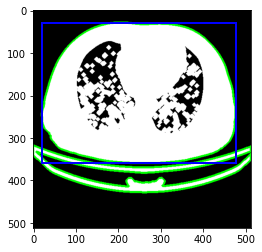

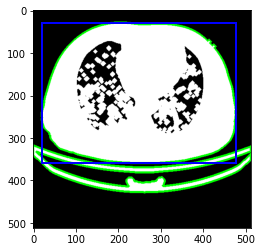

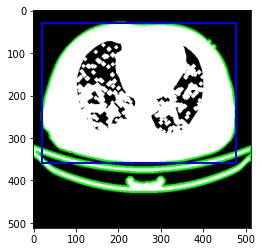

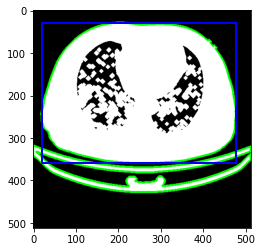

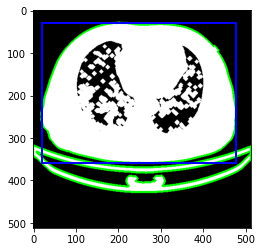

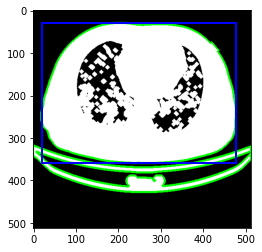

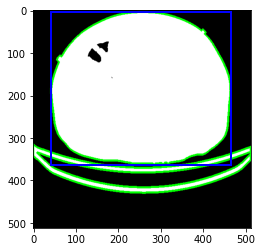

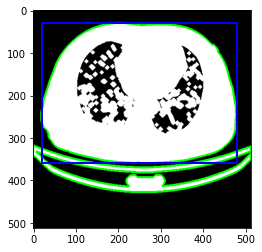

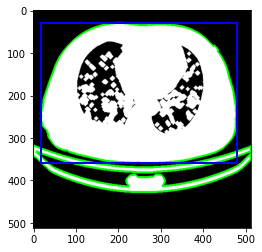

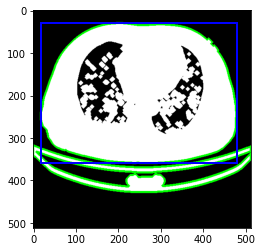

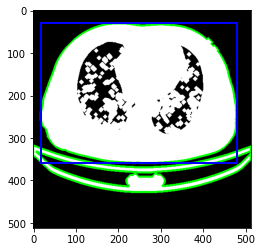

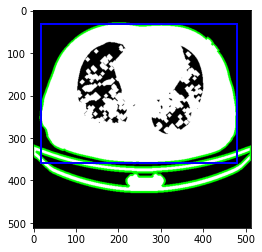

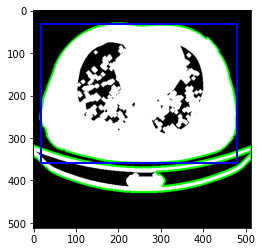

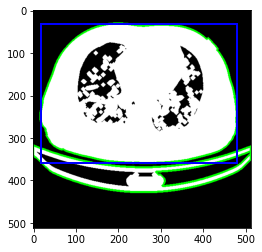

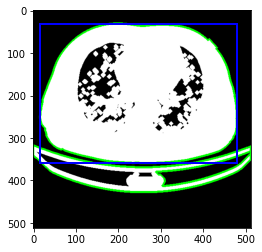

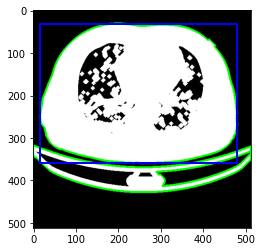

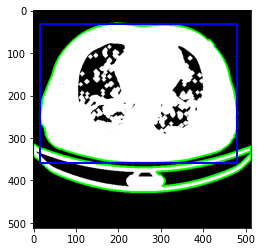

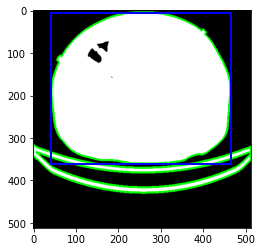

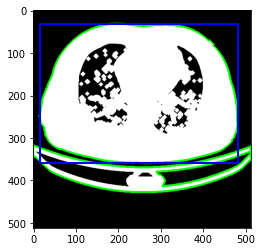

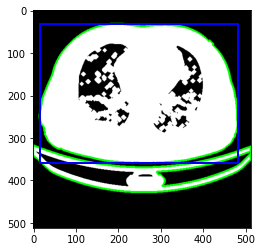

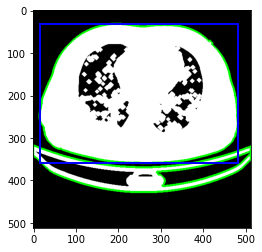

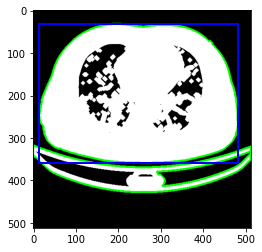

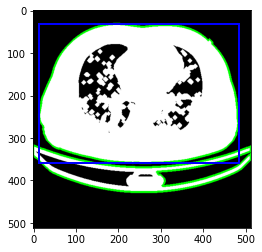

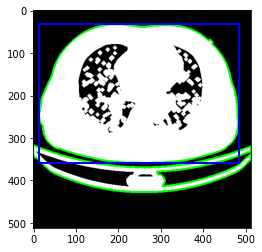

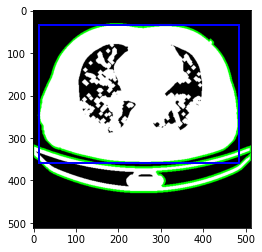

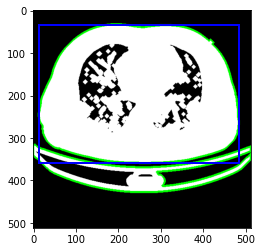

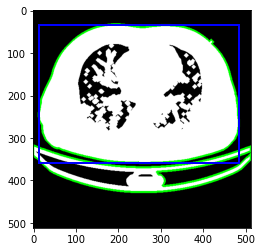

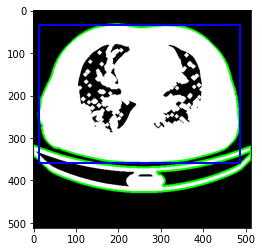

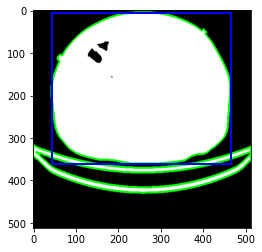

KeyboardInterrupt: 

In [25]:
path = os.path.join('train','ct_scan')
for f in os.listdir(path):
    sample_id = 'corona' if 'corona' in f else 'radio'
    if sample_id == 'corona':
        sample = os.path.join(path,f)
        sample_data = normalize(np.load(sample)).astype(np.float32)*255
        sample_data = sample_data.astype(np.uint8)
        display_roi(sample_data,sample_id) 

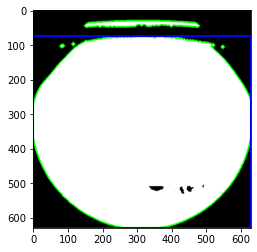

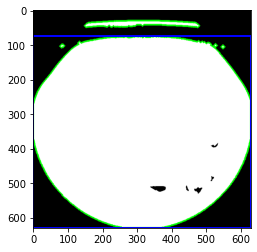

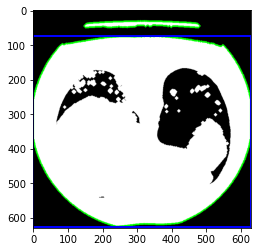

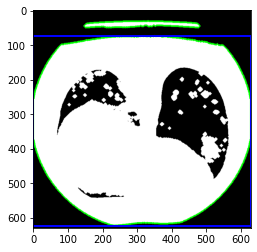

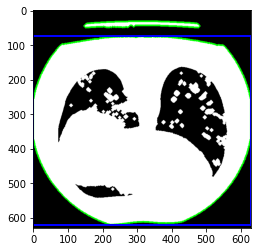

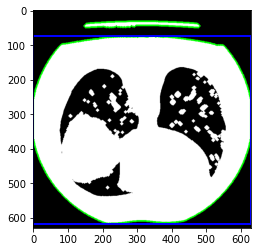

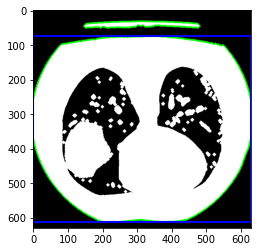

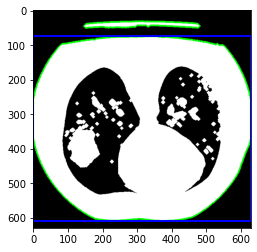

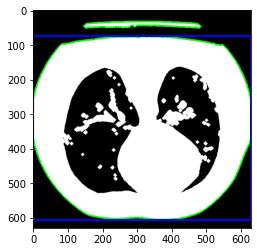

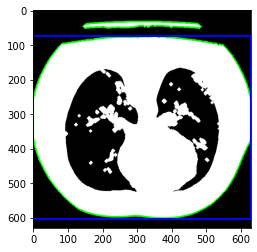

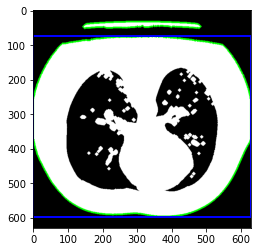

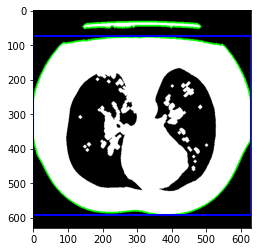

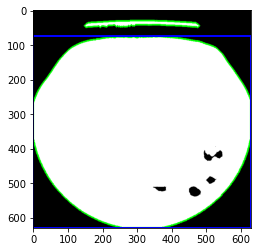

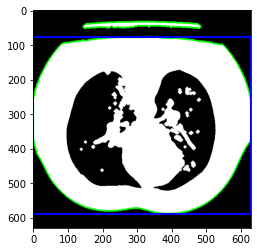

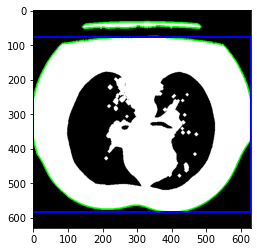

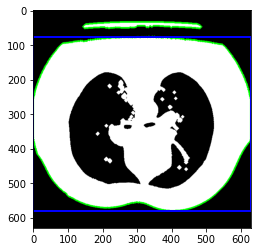

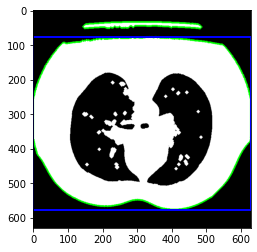

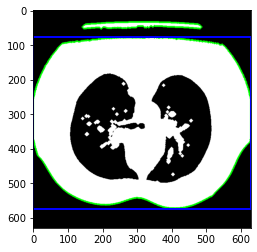

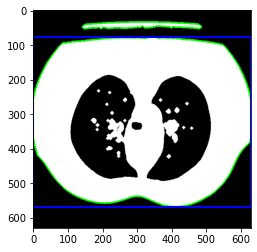

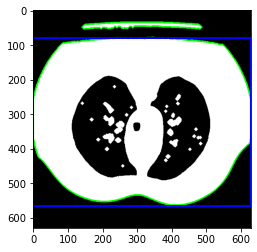

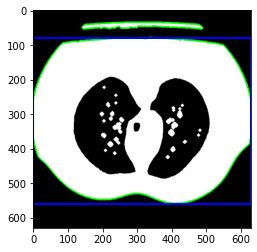

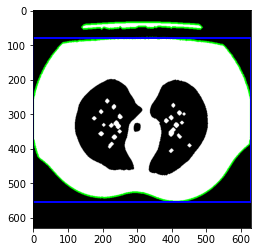

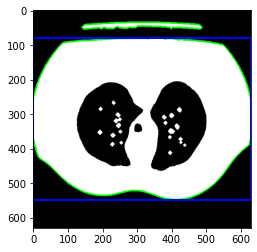

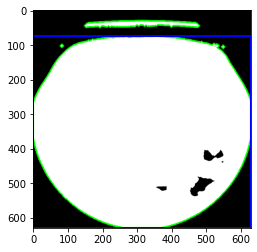

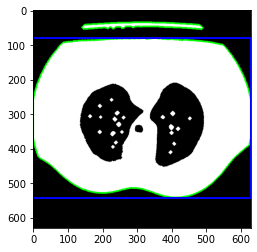

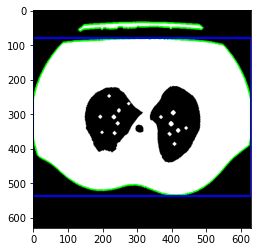

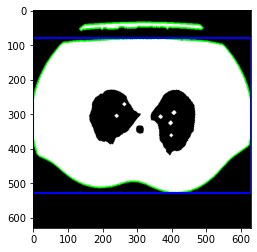

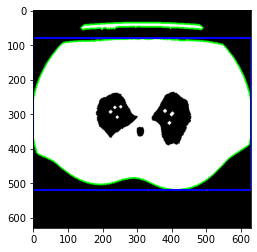

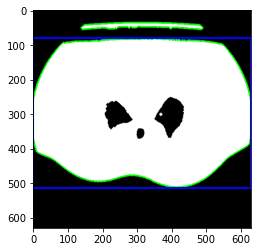

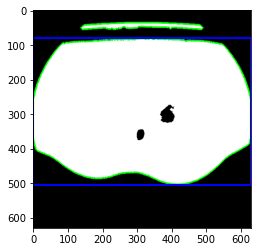

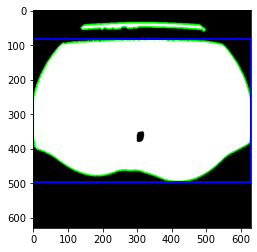

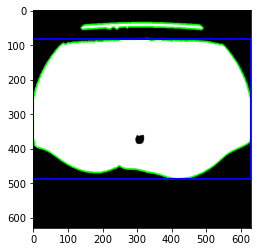

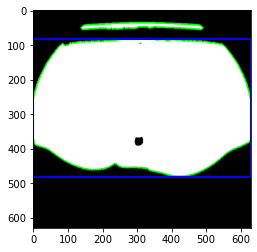

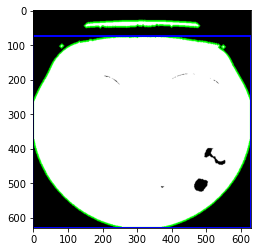

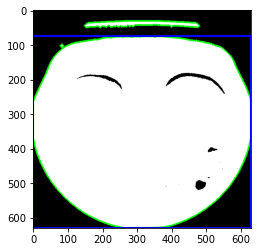

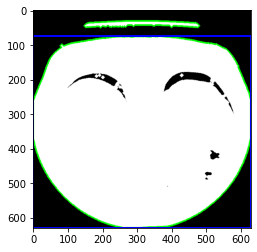

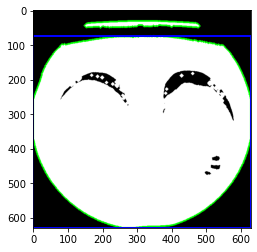

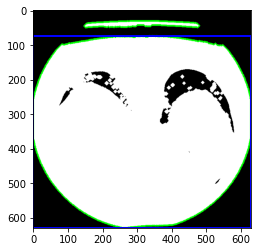

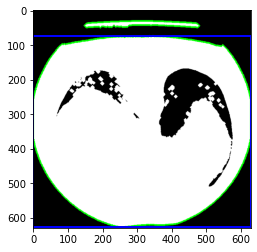

In [15]:
path = os.path.join('val','ct_scan')
for f in os.listdir(path):
    sample_id = 'corona' if 'corona' in f else 'radio'
    if sample_id == 'radio':
        sample = os.path.join(path,f)
        sample_data = normalize(np.load(sample))*255
        sample_data = sample_data.astype(np.uint8)
        display_roi(sample_data,sample_id) 

In [23]:
def get_roi(image, thresh):
    data = image.copy()
    data = data*255
    data = data.astype(np.uint8)

    mask = np.zeros_like(data)
    mask[image>thresh] = 255
    mask_dil = binary_dilation(mask, iterations=5)
    mask[mask_dil] = 255

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    return (x, y, w, h)

def crop_roi(image, roi):
    x, y, w, h = roi
    return image[y:y+h,x:x+w]

# def show_crop(image, thresh):
#     roi = get_roi(image, thresh)
#     # print(roi)

from tqdm import tqdm
path = os.path.join('train','ct_scan')
for f in os.listdir(path):
    sample_id = 'corona' if 'corona' in f else 'radio'
    thresh = 50 if 'corona' in f else 175
    if sample_id == 'corona':
        sample = os.path.join(path,f)
        sample_data = normalize(np.load(sample))*255
        sample_data = sample_data.astype(np.uint8)
        roi = get_roi(sample_data,thresh)
        if roi is None:
            print(f)
            break